## Imports

In [1]:
# %cd /home/liamroy/Documents/PHD/repos/RL_audio/notebooks

%cd '/Users/liamroy/Library/CloudStorage/GoogleDrive-liam.roy@monash.edu/My Drive/LIAM ROY - ROBOTICS/User Study 02 - Auto State Expression/RL_audio/notebooks'

# %cd <add your path here and comment out the others>

/Users/liamroy/Library/CloudStorage/GoogleDrive-liam.roy@monash.edu/My Drive/LIAM ROY - ROBOTICS/User Study 02 - Auto State Expression/RL_audio/notebooks


In [40]:
# IMPORTS
import os
import shutil
import time
import sys
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.ticker import FormatStrFormatter

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns


from scipy import stats
from sklearn import datasets, mixture

from termcolor import colored, cprint
# Termcolor guide: https://pypi.org/project/termcolor/

from openpyxl import Workbook
from openpyxl import load_workbook

%matplotlib widget
# %matplotlib inline
# %matplotlib notebook

# Try to use this website to use the explode feature, so we can see internal blocks and space everything out
# https://terbium.io/2017/12/matplotlib-3d/ 

# Use this website to make your GIFs - generally 50 delay per frame is good
# https://ezgif.com/maker

## Data

These are all the data series for the 24 participants

In [3]:
# Data series for user accuracy

accuracy_before_libA = [3, 2, 1, 1, 2, 3, 2, 1, 3, 2, 0, 3, 3, 0, 2, 2, 3, 2, 1, 3, 1, 2, 2, 2]
accuracy_before_libA_var = np.var(accuracy_before_libA)
print(f"accuracy_before_libA variance: {accuracy_before_libA_var:.04}")
print()

accuracy_before_libB = [3, 1, 3, 2, 1, 2, 0, 1, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2 ,1 ,3, 3]
accuracy_before_libB_var = np.var(accuracy_before_libB)
print(f"accuracy_before_libB variance: {accuracy_before_libB_var:.04}")
print()

accuracy_after_libA = [3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3]
accuracy_after_libA_var = np.var(accuracy_after_libA)
print(f"accuracy_after_libA variance: {accuracy_after_libA_var:.04}")
print()

accuracy_after_libB = [3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3]
accuracy_after_libB_var = np.var(accuracy_after_libB)
print(f"accuracy_after_libB variance: {accuracy_after_libB_var:.04}")
print()

accuracy_delta_libA = [0, 1, 2, 1, 1, 0, -1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1]
accuracy_delta_libA_var = np.var(accuracy_delta_libA)
print(f"accuracy_delta_libA variance: {accuracy_delta_libA_var:.04}")
print()

accuracy_delta_libB = [0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, -1, -1, 1, 0, 1, 0, 1, 2, -2, 0]
accuracy_delta_libB_var = np.var(accuracy_delta_libB)
print(f"accuracy_delta_libB variance: {accuracy_delta_libB_var:.04}")
print()


# Data series for steps to converge

steps_to_conv_sect2X = [36, 38, 43, 42, 41, 36, 43, 38, 39, 36, 41, 36, 36, 41, 36, 59, 36, 41, 42, 36, 36, 60, 36, 36]
steps_to_conv_sect2X_var = np.var(steps_to_conv_sect2X)
print(f"steps_to_conv_sect2X variance: {steps_to_conv_sect2X_var:.04}")
print()


steps_to_conv_sect2O = [12, 10, 15, 12, 20, 11, 40, 15, 12, 10, 18, 12, 10, 14, 11, 58, 11, 15, 23, 11, 19, 21, 9, 13]
steps_to_conv_sect2O_var = np.var(steps_to_conv_sect2O)
print(f"steps_to_conv_sect2O variance: {steps_to_conv_sect2O_var:.04}")
print()

accuracy_before_libA variance: 0.8264

accuracy_before_libB variance: 0.8056

accuracy_after_libA variance: 0.2708

accuracy_after_libB variance: 0.4566

accuracy_delta_libA variance: 0.8889

accuracy_delta_libB variance: 1.082

steps_to_conv_sect2X variance: 40.64

steps_to_conv_sect2O variance: 115.3



## Histogram Plotter

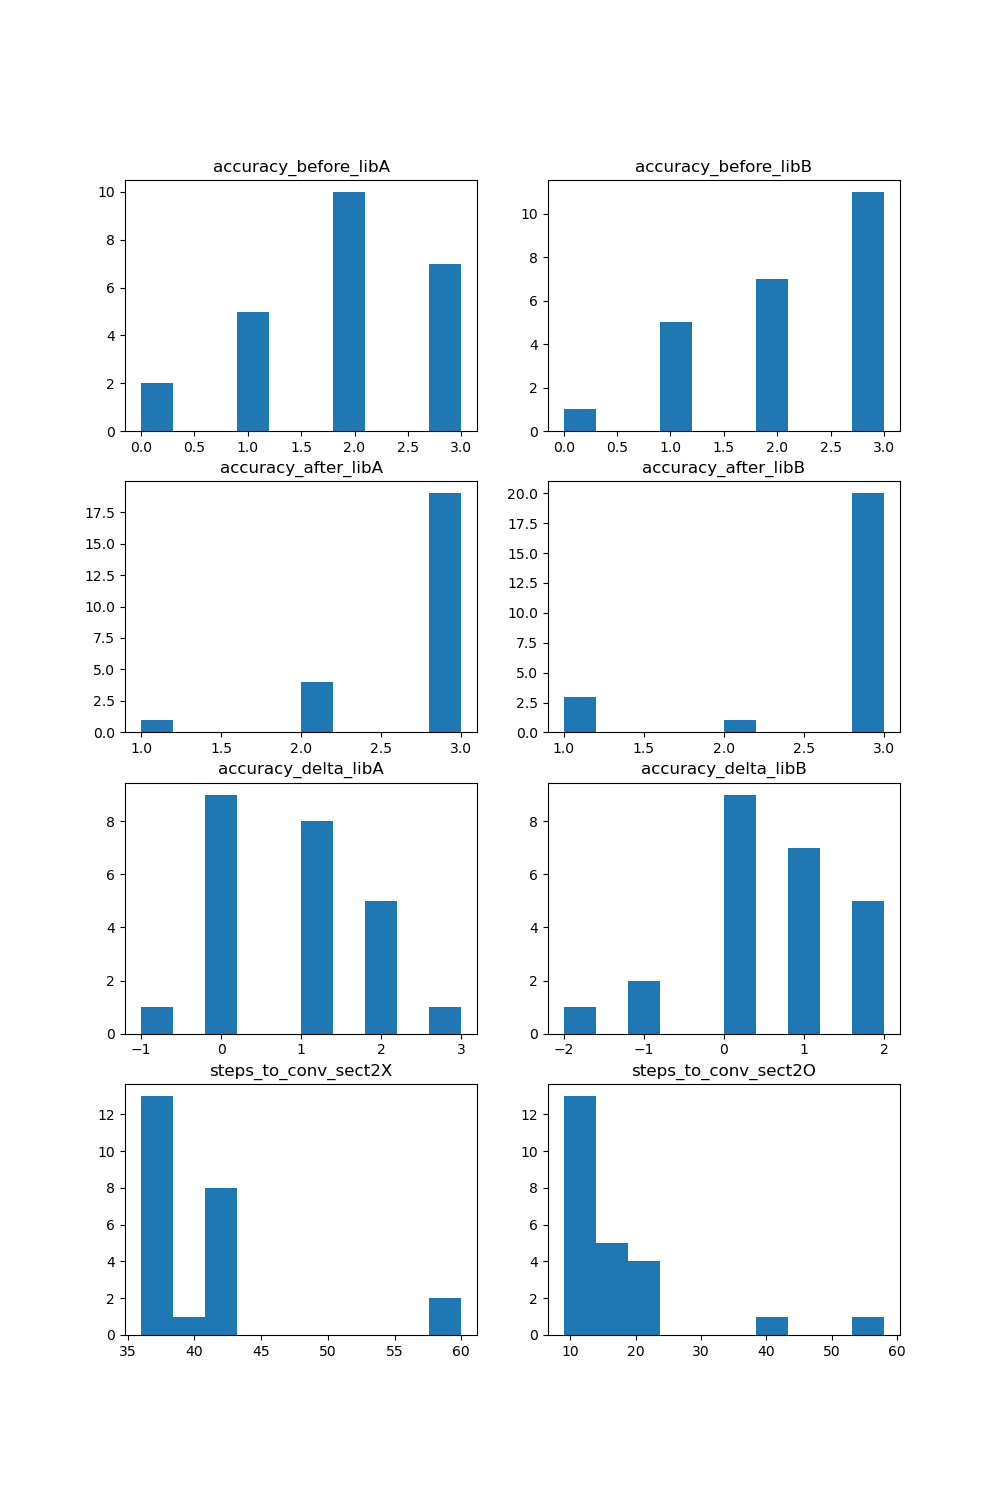

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

count = 0
for row in ax:
    for col in row:
        
        if count == 0:
            col.hist(accuracy_before_libA)
            col.set_title("accuracy_before_libA")
            
        if count == 1:
            col.hist(accuracy_before_libB)
            col.set_title("accuracy_before_libB")

        if count == 2:
            col.hist(accuracy_after_libA)            
            col.set_title("accuracy_after_libA")

        if count == 3:
            col.hist(accuracy_after_libB)
            col.set_title("accuracy_after_libB")

        if count == 4:
            col.hist(accuracy_delta_libA)
            col.set_title("accuracy_delta_libA")

        if count == 5:
            col.hist(accuracy_delta_libB)
            col.set_title("accuracy_delta_libB")
            
        if count == 6:
            col.hist(steps_to_conv_sect2X)
            col.set_title("steps_to_conv_sect2X")
            
        if count == 7:
            col.hist(steps_to_conv_sect2O)
            col.set_title("steps_to_conv_sect2O")

        count +=1 

plt.show()

In [5]:
# SciPi Stats Wilcoxon documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

# The argument alternative defines the alternative hypothesis. Let d represent the difference between the paired samples: d = x - y.
#    ‘two-sided’: the distribution underlying d is not symmetric about zero.
#    ‘less’: the distribution underlying d is stochastically less than a distribution symmetric about zero.
#    ‘greater’: the distribution underlying d is stochastically greater than a distribution symmetric about zero.

# Testing libA before-after (section 1 libA and section 3 libA) --> expect improvement due to algorithm training
result_libA_accuracy = stats.wilcoxon(accuracy_before_libA, accuracy_after_libA, zero_method = "pratt", alternative = "less", mode = "approx")
print(f"TEST: identified states with libA [before]~[after] training \t HYPOTHESIS: improvement \t STATISTIC: {result_libA_accuracy.statistic:.01f} \t P-VALUE: {result_libA_accuracy.pvalue:.06f}")
print()


# Testing libB before-after (section 1 libB and section 3 libB) --> expect improvement due to algorithm training
result_libB_accuracy = stats.wilcoxon(accuracy_before_libB, accuracy_after_libB, zero_method = "pratt", alternative = "less", mode = "approx")
print(f"TEST: identified states with libB [before]~[after] training \t HYPOTHESIS: improvement \t STATISTIC: {result_libB_accuracy.statistic:.01f} \t P-VALUE: {result_libB_accuracy.pvalue:.06f}")
print()


# Testing libA and libB before training (section 1 libA and section 1 libB) --> expect no change to show minor difference in changing sound
result_sound_before = stats.wilcoxon(accuracy_before_libA, accuracy_before_libB, zero_method = "pratt", alternative = "two-sided", mode = "approx")
print(f"TEST: identified states in [libA]~[libB] before training   \t HYPOTHESIS: no significance \t STATISTIC: {result_sound_before.statistic:.01f} \t P-VALUE: {result_sound_before.pvalue:.06f}")
print()


# Testing libA and libB after training (section 3 libA and section 3 libB) --> expect no change to show minor difference in changing sound
result_sound_after = stats.wilcoxon(accuracy_after_libA, accuracy_after_libB, zero_method = "pratt", alternative = "two-sided", mode = "approx")
print(f"TEST: identified states in [libA]~[libB] after training   \t HYPOTHESIS: no significance \t STATISTIC: {result_sound_after.statistic:.01f} \t P-VALUE: {result_sound_after.pvalue:.06f}")
print()


# Testing sect2X (no init) and sect2O (pilot init) --> expect improvement due to initializing with pilot user data
result_steps_to_conv = stats.wilcoxon(steps_to_conv_sect2X, steps_to_conv_sect2O, zero_method = "pratt", alternative = "greater", mode = "approx")
print(f"TEST: steps to converge [sect2X no init]~[sect2O pilot init]   \t HYPOTHESIS: improvement \t STATISTIC: {result_steps_to_conv.statistic:.01f} \t P-VALUE: {result_steps_to_conv.pvalue:.06f}")
print()

TEST: identified states with libA [before]~[after] training 	 HYPOTHESIS: improvement 	 STATISTIC: 14.0 	 P-VALUE: 0.000380

TEST: identified states with libB [before]~[after] training 	 HYPOTHESIS: improvement 	 STATISTIC: 49.5 	 P-VALUE: 0.010282

TEST: identified states in [libA]~[libB] before training   	 HYPOTHESIS: no significance 	 STATISTIC: 97.5 	 P-VALUE: 0.304396

TEST: identified states in [libA]~[libB] after training   	 HYPOTHESIS: no significance 	 STATISTIC: 44.0 	 P-VALUE: 0.654721

TEST: steps to converge [sect2X no init]~[sect2O pilot init]   	 HYPOTHESIS: improvement 	 STATISTIC: 300.0 	 P-VALUE: 0.000009



## Clustering Analysis: Bayesian Information Criterion

In [6]:
sect2X_st0_pd_dataframe = pd.read_excel('user_data/response_book.xlsx', sheet_name = 'conv_idx', header=1, index_col=None, na_values=['NA'], usecols="B:D", nrows=24)

sect2O_st0_pd_dataframe = pd.read_excel('user_data/response_book.xlsx', sheet_name = 'conv_idx', header=1, index_col=None, na_values=['NA'], usecols="E:G", nrows=24)

sect2X_st1_pd_dataframe = pd.read_excel('user_data/response_book.xlsx', sheet_name = 'conv_idx', header=1, index_col=None, na_values=['NA'], usecols="L:N", nrows=24)

sect2O_st1_pd_dataframe = pd.read_excel('user_data/response_book.xlsx', sheet_name = 'conv_idx', header=1, index_col=None, na_values=['NA'], usecols="O:Q", nrows=24)

sect2X_st2_pd_dataframe = pd.read_excel('user_data/response_book.xlsx', sheet_name = 'conv_idx', header=1, index_col=None, na_values=['NA'], usecols="V:X", nrows=24)

sect2O_st2_pd_dataframe = pd.read_excel('user_data/response_book.xlsx', sheet_name = 'conv_idx', header=1, index_col=None, na_values=['NA'], usecols="Y:AA", nrows=24)

clustering_dataframe_list = [sect2X_st0_pd_dataframe, sect2O_st0_pd_dataframe, sect2X_st1_pd_dataframe, sect2O_st1_pd_dataframe, sect2X_st2_pd_dataframe, sect2O_st2_pd_dataframe]

In [7]:
# Use this to confirm data frames are correct

# sect2X_st0_pd_dataframe
# sect2O_st0_pd_dataframe
# sect2X_st1_pd_dataframe
# sect2O_st1_pd_dataframe
sect2X_st2_pd_dataframe
sect2O_st2_pd_dataframe

P1.7  P2.7  P3.7
0      1     0     1
1      1     0     1
2      1     0     1
3      1     0     1
4      1     1     1
5      1     0     1
6      2     0     1
7      1     0     1
8      1     0     1
9      1     1     1
10     1     0     1
11     0     0     1
12     1     0     1
13     2     0     1
14     2     0     1
15     1     0     1
16     1     0     1
17     1     1     1
18     1     0     1
19     1     0     1
20     1     0     1
21     1     1     1
22     1     0     1
23     1     0     1

In [8]:
sect2X_st0_legend = "Uninformed, State 0: Stuck"

sect2X_st1_legend = "Uninformed, State 1: Accomplished"

sect2X_st2_legend = "Uninformed, State 2: Progressing"

sect2O_st0_legend = "Informed, State 0: Stuck"

sect2O_st1_legend = "Informed, State 1: Accomplished"

sect2O_st2_legend = "Informed, State 2: Progressing"

clustering_legend_list = [sect2X_st0_legend, sect2X_st1_legend, sect2X_st2_legend, sect2O_st0_legend, sect2O_st1_legend, sect2O_st2_legend]

In [9]:
def plot_AIC_clustering(dataframe_list, save_str, title_str, legend_list, plotter=True):

    idx_counter = -1

    color_list = ['red', 'orange', 'blueviolet', 'dodgerblue', 'gold', 'green', 'magenta']
    
    fig, axs = plt.subplots(figsize=(10, 6), layout='constrained')

    
    for idx_counter in range(0, 6):

        BIC_dataframe = dataframe_list[idx_counter]
                
        # Fit the data using a Gaussian mixture model and calculate the BIC for
        # different numbers of clusters, ranging for 1 to 10
        ks = np.arange(1,13)
        bics = []
        for k in ks:
            gmm = mixture.GaussianMixture(n_components=k, covariance_type='full') # BayesianGaussianMixture or GaussianMixture
            gmm.fit(BIC_dataframe)
            bics.append(gmm.aic(BIC_dataframe)) # Akaike information criterion for the current model on the input X.
        
        
        # Plot the data    
        
        clusterplot = axs.plot(ks, bics, color=color_list[idx_counter], linewidth=3)
        
    axs.set_title(title_str, size = 18)

    axs.set_xlabel("\nNumber of clusters, $k$\n", size = 15)
    axs.set_ylabel("\nBIC", size = 15)
    axs.set_xticks(ks);
    
    axs.grid(color='black', linestyle='-', linewidth=0.1)

    axs.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    axs.xaxis.set_ticks(np.arange(1, 13, 1))

    axs.set_xlim(1, 12)

    axs.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    axs.yaxis.set_ticks(np.arange(-700, 400, 50))

    axs.legend(legend_list, loc='upper right', prop = { "size": 15 })


    # Save the fig
    plt.savefig(save_str, bbox_inches='tight', pad_inches=0.25)

    
    # Show the fig if plotter is not set to None
    if plotter:
        plt.show()

    if plotter == None:
        print(" Plots closed. ")
        matplotlib.pyplot.close()



In [10]:
def plot_BIC_clustering(dataframe_list, save_str, title_str, legend_list, plotter=True):

    idx_counter = -1

    color_list = ['red', 'orange', 'blueviolet', 'dodgerblue', 'gold', 'green', 'magenta']
    
    fig, axs = plt.subplots(figsize=(10, 6), layout='constrained')

    
    for idx_counter in range(0, 6):

        BIC_dataframe = dataframe_list[idx_counter]
                
        # Fit the data using a Gaussian mixture model and calculate the BIC for
        # different numbers of clusters, ranging for 1 to 10
        ks = np.arange(1,13)
        bics = []
        for k in ks:
            gmm = mixture.GaussianMixture(n_components=k, covariance_type='full') # BayesianGaussianMixture or GaussianMixture
            gmm.fit(BIC_dataframe)
            bics.append(gmm.bic(BIC_dataframe)) # Bayesian information criterion for the current model on the input X.
        
        
        # Plot the data    
        
        clusterplot = axs.plot(ks, bics, color=color_list[idx_counter], linewidth=3)
        
    axs.set_title(title_str, size = 18)

    axs.set_xlabel("\nNumber of clusters, $k$\n", size = 15)
    axs.set_ylabel("\nBIC", size = 15)
    axs.set_xticks(ks);
    
    axs.grid(color='black', linestyle='-', linewidth=0.1)

    axs.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    axs.xaxis.set_ticks(np.arange(1, 13, 1))

    axs.set_xlim(1, 12)

    axs.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    axs.yaxis.set_ticks(np.arange(-700, 400, 50))

    axs.legend(legend_list, loc='upper right', prop = { "size": 15 })


    # Save the fig
    plt.savefig(save_str, bbox_inches='tight', pad_inches=0.25)

    
    # Show the fig if plotter is not set to None
    if plotter:
        plt.show()

    if plotter == None:
        print(" Plots closed. ")
        matplotlib.pyplot.close()

/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return 

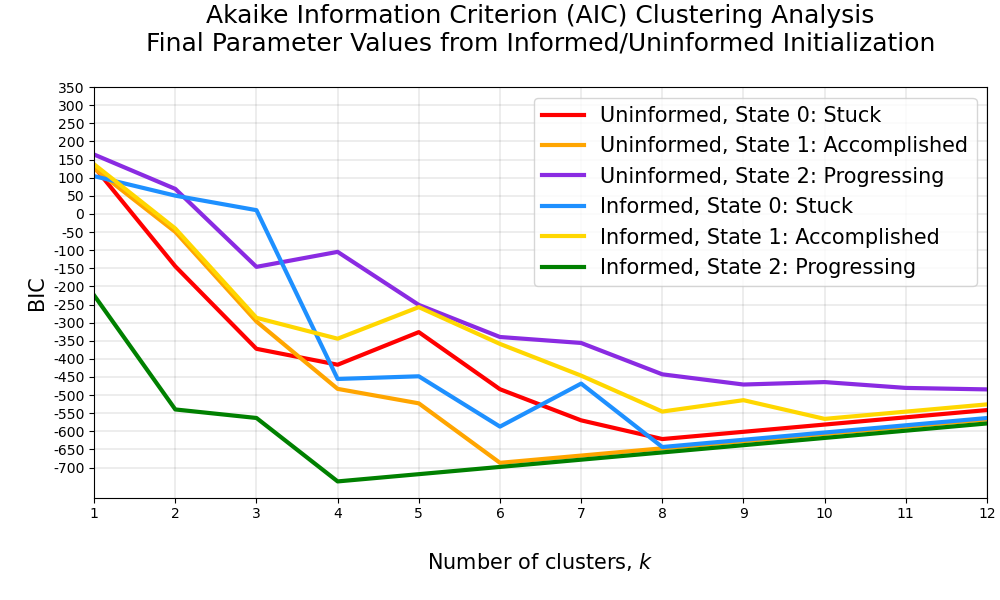

In [11]:
plot_AIC_clustering(dataframe_list=clustering_dataframe_list, 
                    save_str="plots/clustering_plots/cluster_plots/AIC_cluster_plot.png", 
                    title_str='Akaike Information Criterion (AIC) Clustering Analysis\nFinal Parameter Values from Informed/Uninformed Initialization\n', 
                    legend_list=clustering_legend_list)

/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/liamroy/miniforge3/envs/phd/lib/python3.9/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return 

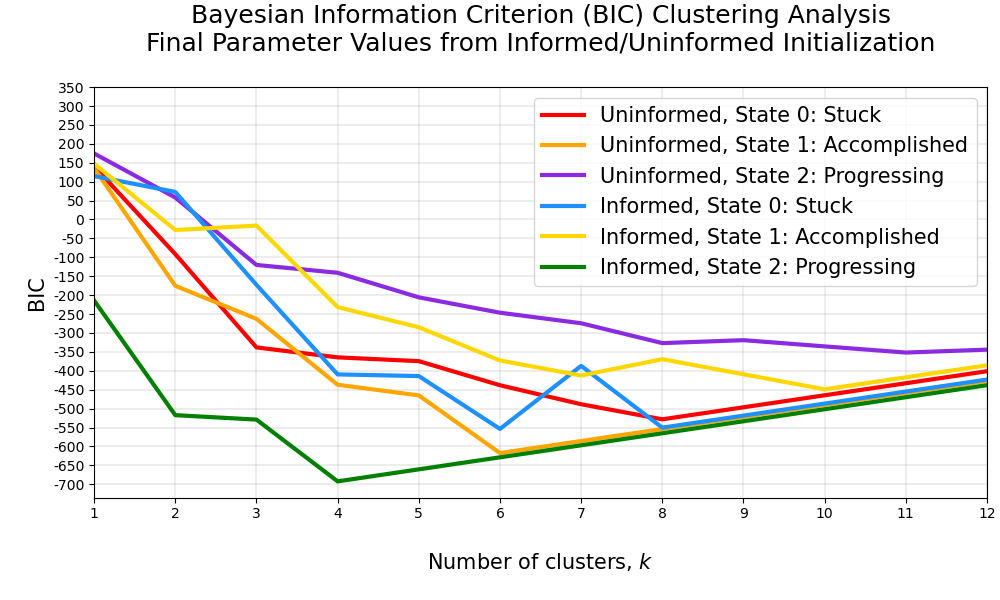

In [12]:
plot_BIC_clustering(dataframe_list=clustering_dataframe_list, 
                    save_str="plots/clustering_plots/BIC_cluster_plot.png",
                    title_str='Bayesian Information Criterion (BIC) Clustering Analysis\nFinal Parameter Values from Informed/Uninformed Initialization\n', 
                    legend_list=clustering_legend_list)

## Collect Data into CVS for Logistic Regression Predictor

In [13]:
# For Each User

# For Each State fianl matrix

# Read each cube, get feature values (P1, P2, P3, etc..)
# Enter those values into the next line of our CVS/Excel file 

In [62]:

user_IDs = [*range(3, 27)] # 3 to 26 , 27
 
comm_states = ['st0', 'st1', 'st2'] # states 0, 1 and 2

sections = ['sect2X', 'sect2O']

workbook_path = "user_data/response_book.xlsx"
response_book = load_workbook(workbook_path)


for state in comm_states:
    
    for section in sections:

        line_counter = 2 #start input to CVS on line 2
        
        try: # Try to open existing sheet
            response_sheet = response_book.get_sheet_by_name("regression_" + state + "_" + section)
        except KeyError:  # If ot doesn't exist. create it
            response_sheet = response_book.create_sheet(title="regression_" + state + "_" + section)
    
        response_sheet["A1"] = "Value"
        response_sheet["B1"] = "Correct"
        response_sheet["C1"] = "User_ID"
        response_sheet["D1"] = "P1_BPM"
        response_sheet["E1"] = "P2_BPL"
        response_sheet["F1"] = "P3_Pitch"
        response_sheet["G1"] = "Confidence"
    
        for user_ID in user_IDs:

            user_ID_str = str("{:02d}".format(user_ID))    
            
            # st0_final_matrix = np.load("user_data/user_" + user_ID_str + "/arrays/" + user_ID_str + "_" + section + "_final_st0.npy") # Stuck
            # st1_final_matrix = np.load("user_data/user_" + user_ID_str + "/arrays/" + user_ID_str + "_" + section + "_final_st1.npy") # Accomplished 
            final_matrix = np.load("user_data/user_" + user_ID_str + "/arrays/" + user_ID_str + "_" + section + "_final_" + state + ".npy") # Progressing

            # print()
            # print(f"section: {section}   user: {user_ID}")
            # print(f"state: \n{state}") 
            # print(final_matrix)
            # print()

            # Itterate param indecies.
            # Recall: param_0 = Speed of audio loop (BPM)         --> (100 BPM   //  140 BPM  //  180 BPM)
            #         param_1 = Number of beeps per loop (BPL)   --> (1 BPL     //  2 BPM     //  4 BPL) 
            #         param_2 = Amplitude of Pitch Bend           --> (downward  //  neutral  //  upward)

            for param_0_idx in range(0, 3):
                for param_1_idx in range(0, 3):
                    for param_2_idx in range(0, 3):

                        cube_value = final_matrix[param_0_idx, param_1_idx, param_2_idx]
                        
                        response_sheet["A" + str(line_counter)] = cube_value
                        
                        if cube_value > 0:
                            response_sheet["B" + str(line_counter)] = 1
                        elif cube_value <= 0:
                            response_sheet["B" + str(line_counter)] = 0

                        
                        response_sheet["C" + str(line_counter)] = user_ID
                        response_sheet["D" + str(line_counter)] = param_0_idx
                        response_sheet["E" + str(line_counter)] = param_1_idx
                        response_sheet["F" + str(line_counter)] = param_2_idx
                        response_sheet["G" + str(line_counter)] = abs(cube_value)
                        
                        line_counter += 1
                        
response_book.save(workbook_path)

print()
print("terminated and workbook saved")

/var/folders/vx/sqc7hy3d7tzbzb4vn45c7n8h0000gn/T/ipykernel_28436/253527091.py:18: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  response_sheet = response_book.get_sheet_by_name("regression_" + state + "_" + section)



terminated and workbook saved


In [112]:
comm_states = ['st0', 'st1', 'st2'] # states 0, 1 and 2

sections = ['sect2X', 'sect2O']


for state in comm_states:
    
    for section in sections:


        regression_dataframe = pd.read_excel("user_data/response_book.xlsx", 
                                                       sheet_name="regression_" + state + "_" + section,
                                                       nrows = 649)
        
        trimmed_regression_dataframe = regression_dataframe.drop(['Value', 'User_ID'], axis=1)
        
        trimmed_regression_dataframe['Correct'] = trimmed_regression_dataframe.Correct.astype('category')
        trimmed_regression_dataframe['P1_BPM'] = trimmed_regression_dataframe.P1_BPM.astype('category')
        trimmed_regression_dataframe['P2_BPL'] = trimmed_regression_dataframe.P2_BPL.astype('category')
        trimmed_regression_dataframe['P3_Pitch'] = trimmed_regression_dataframe.P3_Pitch.astype('category')
        
        categorical_features=identify_nominal_columns(trimmed_regression_dataframe)
        print(f"\ncategorical_features: {categorical_features}\n")
        
        state_str_trim = state[2:3]
        section_str_trim = section[4:6]
        
        if state == 'st0':
            state_str = 'Stuck'
        elif state == 'st1':
            state_str = 'Accomplished'
        elif state == 'st2':
            state_str = 'Progressing'
            
        final_plot = associations(trimmed_regression_dataframe, filename= "plots/correlation_matrices/" + state + "_" + section + '_correlation_matrix.png', 
                                            figsize=(12,12), sv_color='silver', plot=False,
                                            title="Section " + section_str_trim + ": Uninformed Initialization \nCorrelation Matrix State " + state_str_trim + ": " + state_str + "\n")


categorical_features: ['Correct', 'P1_BPM', 'P2_BPL', 'P3_Pitch']


categorical_features: ['Correct', 'P1_BPM', 'P2_BPL', 'P3_Pitch']


categorical_features: ['Correct', 'P1_BPM', 'P2_BPL', 'P3_Pitch']


categorical_features: ['Correct', 'P1_BPM', 'P2_BPL', 'P3_Pitch']


categorical_features: ['Correct', 'P1_BPM', 'P2_BPL', 'P3_Pitch']


categorical_features: ['Correct', 'P1_BPM', 'P2_BPL', 'P3_Pitch']

